###Installation

In [ ]:
!pip install -q tfds-nightly tf matplotlib

     |████████████████████████████████| 4.7 MB 33.3 MB/s 


#####Import libraries

In [1]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

###Available Datasets

In [2]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'criteo',
 'cs_restaurants',
 'cura

###Load a Dataset

In [3]:
ds = tfds.load('mnist',split='train',shuffle_files=True)
assert isinstance(ds,tf.data.Dataset)
print(ds)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


#####tfds builder

In [4]:
builder = tfds.builder('mnist')
builder.download_and_prepare()
ds = builder.as_dataset(split='train',shuffle_files=True)
print(ds)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


###Iterate over a dataset

#####As dict

In [5]:
ds = tfds.load('mnist',split = 'train')
#Take one example
ds = ds.take(1)

for example in ds:
  print(list(example.keys()))
  image = example['image']
  label = example['label']
  print(image.shape,label)


['image', 'label']
(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


#####As tuple

In [6]:
ds = tfds.load('mnist', split='train', as_supervised=True)
ds = ds.take(1)

for image, label in ds:  # example is (image, label)
  print(image.shape, label)

(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


#####As Numpy

In [7]:
ds = tfds.load('mnist', split='train', as_supervised=True)
ds = ds.take(1)

for image, label in tfds.as_numpy(ds):
  print(type(image), type(label), label)

<class 'numpy.ndarray'> <class 'numpy.int64'> 4


#####As batched tf.Tensor

In [8]:
image, label = tfds.as_numpy(tfds.load(
    'mnist',
    split='test',
    batch_size=-1,
    as_supervised=True,
))

print(type(image), image.shape)

<class 'numpy.ndarray'> (10000, 28, 28, 1)


###Benchmark your datasets

In [9]:
ds = tfds.load('mnist',split='train')
ds = ds.batch(32).prefetch(1)
tfds.benchmark(ds,batch_size=32)

  0%|          | 1/1875 [00:00<?, ?it/s]


************ Summary ************

Examples/sec (First included) 8847.40 ex/sec (total: 60000 ex, 6.78 sec)
Examples/sec (First only) 906.00 ex/sec (total: 32 ex, 0.04 sec)
Examples/sec (First excluded) 8888.97 ex/sec (total: 59968 ex, 6.75 sec)


,duration,num_examples,avg
first+lasts,6.781656,60000,8847.396107
first,0.035320,32,905.996596
lasts,6.746336,59968,8888.973043


###Visualization

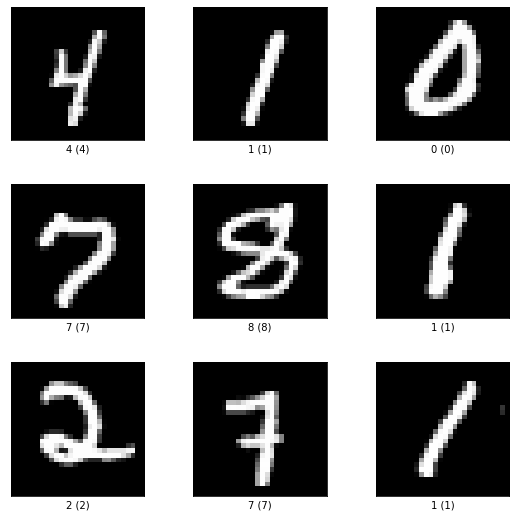

In [10]:
ds,info = tfds.load('mnist',
                    split = 'train',
                    with_info = True)
tfds.as_dataframe(ds.take(4),info)
fig = tfds.show_examples(ds,info)

###Access the dataset metadata

In [11]:
ds,info = tfds.load('mnist',
                    with_info=True)
builder = tfds.builder('mnist')
info = builder.info
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='~/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


In [12]:
print(info.features['label'].num_classes)

10


In [13]:
print(info.features['label'].names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [14]:
print(info.features['label'].int2str(7))

7


#Load Numpy Data

In [17]:
data_url = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'
path = tf.keras.utils.get_file('mnist.npz',data_url)
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

11490434/11490434 [==============================] - 0s 0us/step


###Use the datasets

#####Shuffle and batch the datasets

In [18]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    train_examples,train_labels
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    test_examples,test_labels
))

In [19]:
batch_size = 64
shuffle_buffer_size = 100
train_dataset = train_dataset.shuffle(shuffle_buffer_size).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

#####Build and train a model

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

In [21]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 4.0171 - sparse_categorical_accuracy: 0.8823
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.6500 - sparse_categorical_accuracy: 0.9267
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4323 - sparse_categorical_accuracy: 0.9470
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3497 - sparse_categorical_accuracy: 0.9543
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3089 - sparse_categorical_accuracy: 0.9622
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2643 - sparse_categorical_accuracy: 0.9668
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2417 - sparse_categorical_accuracy: 0.9697
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2460 - sparse_categorical_accuracy: 0.9715
Epoch 9/10
938/938 [============================

In [ ]:
model.evaluate(test_dataset)